# Supervised learning introduction, K-Nearest Neighbors (KNN)
-----


#### 1. Read data

The provided three files (glass.data, glass.tag, glass.names) contains a small dataset. "[The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)"

 - read the content of the glass.data file as a pandas dataframe
 - use the column names found in the glass.names file
 - if needed, handle the missing values
 - get rid of the ID column
 - separate the GlassType from the dataset and store it in a one-hot encoded manner (if we have 3 classes, than instead of 1, 2, 3 we use [1, 0, 0], [0, 1, 0] and [0, 0, 1]. So each dimension represents a class and 1 means the sample belongs to that class, 0 is the opposite)
    - be careful, the data contains only 1-2-3-5-6-7, 4 is missing! Convert 5 $\to$ 4, 6 $\to$ 5 and 7 $\to$ 6 and then apply the one-got encoding
    - also keep the converted labels, where y is 1-2-3-4-5-6, we will need them later
 
-----

#### 2. \& 3. Implement KNN

Implement the K-nearest neighbors regression algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporing the given class divided by **k** (for example if **k** is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). 

Complete the function!

```python
def knn_classifier(k, X_train, y_train, X_test):
    ...
    return predictions
```
 - **k** is the number of neighbors to be considered
 - **X_train** is the training data points
 - **X_test** is the test data points
 - **y_train** is the labels for the training data
 - assume that **y_test** is one-hot encoded.

A valid-syntaxed input looks like:
````python
k = 2
X_train = [[0.9, 0.2, 0.8] , [-1.2, 1.5, 0.7], [5.8, 0.0, 0.9], [6.2, 0.9, 0.9]]
y_train = [[0, 1], [0, 1], [1, 0], [0, 1]]
X_test  = [[0.8, 0.8, 0.6], [0.5, 0.4, 0.3]]
```

Here, it means that the training data consists of 4 points, each point is placed in a 3 dimensional space. And there are two possible classes for each point and there are two data points for that predictions is needed.

#### 4. Predictions & interpretation

- use every second (0, 2, 4, etc indicies) datapoint as training data and use the rest (1, 3, 5, ...) as test data
- generate predictions with the implemented KNN with k=5
- calculate the accuracy and the confusion matrix for the predictions
- if the probability is the same for two or more classes select the first one from the left in the one-hot encoded version (or which has the smallest number in the original dataset)

-----

#### 5. Compare it to Sklearn's KNN
- using the same train/test split generate predictions with sklearn KNNs. Use 5 neighbors again
- are the predictions the same as for our implementation? (they should be)
   - note: to get sklearn perform the same algorithm as out implementation it expects you to provide non one-hot encoding labels. That's why we kept them in the first exercise


-----


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

# Preps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Task 1

In [2]:
def get_cols(start=43,end=56,skip=47):    
    """
    Since the glass.names is aviable to check, I decided to check wich lines contains the column names and read them from it
    I assume there are sophisticated ways to solve this problem, but it does it's work
    So it reads the glass.names, takes the lines one by one, and from the start line to end reads column names and skips the skip parameter
    """
    file_to_read = open("glass.names")
    cols = []
    for position, line in enumerate(file_to_read):
        if position > start and position <end and position != skip:
                cols.append(line.split(". ",)[1].split(":")[0])
    return cols

In [3]:
def read_reform(file_name = "glass.data", dropThis="Id number",fill = False):
    """
    This function read the glass.data, or whatever you give it and read it, by the delimiter ,
    Then drops a column Id number
    Optnionally fills the missing values with column wise mean, default is False so won't do it 
    Finally does the one-hot encoding with the pandas get_dummies function and ads it to the original DataFrame object
    """
    df = pd.read_csv(file_name,names = get_cols() ,delimiter = ",")
    df = df.drop(dropThis,axis = 1 )
    if fill:
        df.fillna(df.mean(),inplace = True)
    df["Type of glass"].where(df["Type of glass"] < 4, df["Type of glass"]-1 , axis = 0, inplace = True)
   
    return df

In [4]:
df = read_reform()

In [5]:
# Slice the DataFrame into 4 parts, wich we want to use
Y_train = np.array(df["Type of glass"][::2])
Y_test = np.array(df["Type of glass"][1::2])
X_train = np.array(df[::2][df.columns[:len(df.columns)-1]])
X_test = np.array(df[1::2][df.columns[:len(df.columns)-1]])

In [6]:
df = pd.concat([df,pd.get_dummies(df["Type of glass"])],axis = 1 )

# Task 2 & 3

In [7]:
def dists(a,points):
    """
    It creates a matrix wich contains the distances of every point
    It's first index reffers to the f
    """ 
    return [np.linalg.norm(a-b) for b in points]    

In [8]:
def get_indexes(k,distance):
    """
    This function will return the indexes of the k nearest points 
    Create indexes for every element of the list, than sort the lists and the indexes with them
    Returns the indexes, we want
    """
    indexes = [i for i in range (len(distance))]
    zipped = zip(distance,indexes)
    sorted_zipped_lists = sorted(zipped)

    sorted_list1 = [element for _, element in sorted_zipped_lists]
    
    return sorted_list1[:k]

In [9]:
def hot_encode(num):
    """
    This function is a very, very basic hot-encoder function if it is required to classify the values in this format
    """
    res = np.zeros(6)
    res[num-1] = 1
    return res

In [10]:
def knn_classifier(k,X_train,Y_train,X_test, hot_encode_required = True):   
    """
    This is my knn classifier using only numpy
    I added an optional hot_encode_required argument if it would be necesarry
    The second solution is kinda better, because it uses list comprehension isteand of appending
    But through the first part it's easier to see what does the function actually do
    """
    # First part
    if hot_encode_required:
        predictions = []
        for point in X_train:
            distances = dists(point,X_test)
            nearest_indexes = get_indexes(k,distances)
            predictions.append(hot_encode(np.bincount(Y_train[nearest_indexes]).argmax()))
        return predictions
    #Second part
    else:
        return  [np.bincount(Y_train[get_indexes(k,dists(point,X_train))]).argmax() for point in X_test]
    
        

# Task 4

In [11]:
preds = knn_classifier(5,X_train,Y_train,X_test)

In [12]:
def confusion_mx(predictions,actuals):
    """
    This function creates a confusion matrix object and returns it if it would be necesarry just uncomment the last line
    Also creates a heatmap, wich helps us to visualize
    I used the original types and not the hot-encoded ones, because it's esier to see 1 number insted of a series of numbers
    And because the sklearn uses also non hot-encoded values, easier to compare
    """
    df = pd.DataFrame({'Actual':actuals,'Predicted':predictions} , columns=['Actual','Predicted'])    
    confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames =['Actual'],colnames =['Predicted'] )
    sns.heatmap(confusion_matrix,annot = True)
   # return confusion_matrix

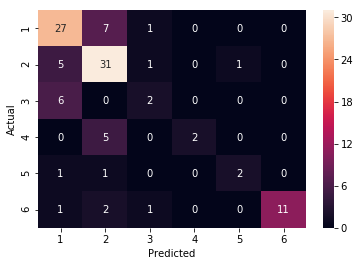

In [13]:
confusion_mx(knn_classifier(5,X_train,Y_train,X_test,False),Y_test)

# Task 5

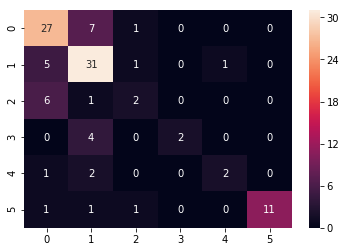

In [14]:
model = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")
model.fit(X_train,Y_train)
preds_2 = model.predict(X_test)

sns.heatmap(confusion_matrix(Y_train,preds_2), annot = True)